**Project 1 - Stock Price Prediction**

In [1]:
import yfinance as yf

In [2]:
data = yf.download('AAPL', start='2015-01-01', end='2025-01-01')

[*********************100%***********************]  1 of 1 completed


In [3]:
print(data.head())

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2015-01-02  24.347172  24.817057  23.906236  24.805922  212818400
2015-01-05  23.661272  24.195739  23.474210  24.115569  257142000
2015-01-06  23.663500  23.924052  23.300507  23.725854  263188400
2015-01-07  23.995314  24.095525  23.761484  23.872831  160423600
2015-01-08  24.917263  24.975164  24.206868  24.324897  237458000


In [4]:
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data.dropna(inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

features = data[['SMA_10', 'SMA_50']]  # Example features
target = data['Close']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}, RMSE: {rmse}, R²: {r2}")

MAE: 1.92256543837637, RMSE: 9.157283464886492, R²: 0.9978066852204156


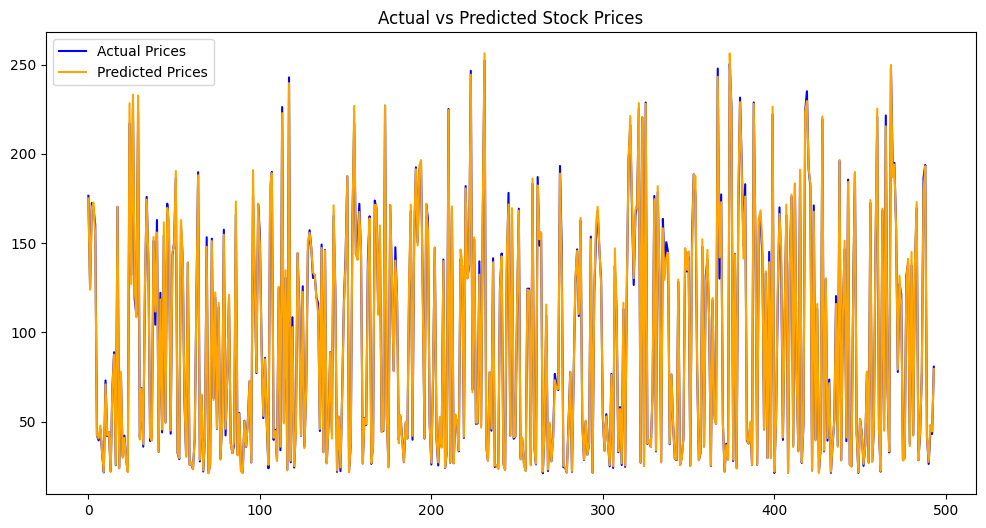

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='orange')
plt.legend()
plt.title('Actual vs Predicted Stock Prices')
plt.show()


In [9]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the 'Close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create sequences
sequence_length = 60
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for LSTM input (samples, time steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.fit(X, y, batch_size=32, epochs=50)

Epoch 1/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step - loss: 0.0330
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - loss: 0.0023
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 0.0017
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 71ms/step - loss: 0.0015
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0014
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0013
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 49ms/step - loss: 0.0012
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0011
Epoch 9/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0010
Epoch 10/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 0.0011
Epoch 11/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 9.5873e-04
Epoch 12/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 8.3613e-04
Epoch 13/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 0.0010
Epoch 14/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 8.7543e-04
Epoch 15/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - lo

In [12]:
predicted_prices = model.predict(X)
predicted_prices = scaler.inverse_transform(predicted_prices)

76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step


In [13]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Close'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.7906984216853274
p-value: 0.991484529788817


In [14]:
data['Diff'] = data['Close'] - data['Close'].shift(1)
data.dropna(inplace=True)

In [15]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.9 MB/s eta 0:00:00


In [16]:
from pmdarima import auto_arima

model = auto_arima(data['Close'], seasonal=False, trace=True)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10289.779, Time=3.86 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10285.850, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10287.422, Time=0.34 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10287.397, Time=0.80 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10289.116, Time=0.12 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=10287.901, Time=4.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 9.781 seconds


In [17]:
forecast = model.predict(n_periods=30)  # Predict the next 30 days
print(forecast)

2466    250.510066
2467    250.600134
2468    250.690202
2469    250.780270
2470    250.870337
2471    250.960405
2472    251.050473
2473    251.140541
2474    251.230609
2475    251.320677
2476    251.410745
2477    251.500812
2478    251.590880
2479    251.680948
2480    251.771016
2481    251.861084
2482    251.951152
2483    252.041220
2484    252.131287
2485    252.221355
2486    252.311423
2487    252.401491
2488    252.491559
2489    252.581627
2490    252.671694
2491    252.761762
2492    252.851830
2493    252.941898
2494    253.031966
2495    253.122034
dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [34]:
# Example for rolling calculations
data['SMA_10'] = data['Close'].rolling(window=10).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=10).std()

# Drop NaN values introduced by rolling
data.dropna(inplace=True)

# Define features and target
X = data[['SMA_10', 'SMA_50', 'Volatility']].values
y = data['Close'].values

print("Updated shape of X:", X.shape)
print("Updated shape of y:", y.shape)


Updated shape of X: (0, 3)
Updated shape of y: (0, 1)


In [35]:
#data['SMA_10'] = data['Close'].rolling(window=10).mean()
#data['SMA_50'] = data['Close'].rolling(window=50).mean()
#data['Volatility'] = data['Close'].rolling(window=10).std()
#data.dropna(inplace=True)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = data[['SMA_10', 'SMA_50', 'Volatility']]
y = data['Close']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(n_estimators=100)
model_rf.fit(X_train, y_train)

predictions_rf = model_rf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model_gb.fit(X_train, y_train)

predictions_gb = model_gb.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [38]:
final_predictions = (predictions_rf + predictions_gb) / 2

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")

# Train the model with the best parameters
best_rf = grid_search_rf.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [40]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# Initialize Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Perform grid search
grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Best parameters
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")

# Train the model with the best parameters
best_gb = grid_search_gb.best_estimator_

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Best Parameters for Gradient Boosting: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 300}


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Random Forest Evaluation
rf_predictions = best_rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f"Random Forest - MAE: {rf_mae}, RMSE: {rf_rmse}, R²: {rf_r2}")

# Gradient Boosting Evaluation
gb_predictions = best_gb.predict(X_test)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

print(f"Gradient Boosting - MAE: {gb_mae}, RMSE: {gb_rmse}, R²: {gb_r2}")

Random Forest - MAE: 1.4949983384831234, RMSE: 5.825928596666187, R²: 0.9986045976031135
Gradient Boosting - MAE: 1.5392743757414007, RMSE: 5.980503365657698, R²: 0.998567574491764


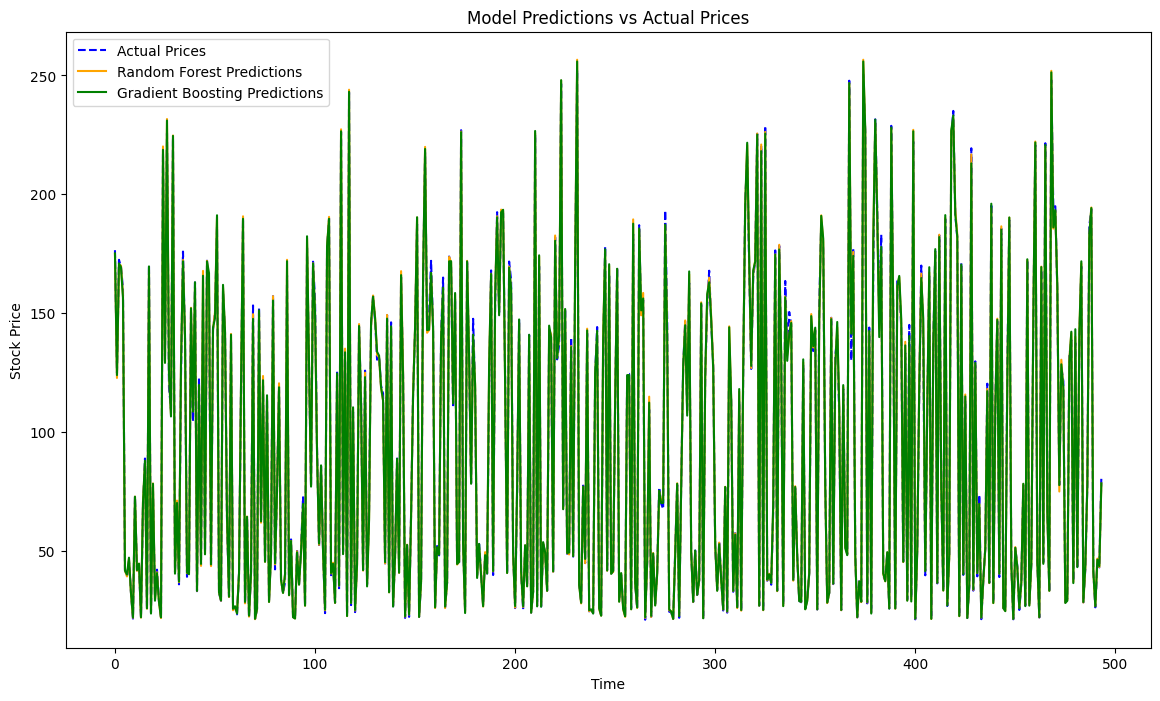

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.plot(y_test.values, label='Actual Prices', color='blue', linestyle='--')
plt.plot(rf_predictions, label='Random Forest Predictions', color='orange')
plt.plot(gb_predictions, label='Gradient Boosting Predictions', color='green')

plt.title('Model Predictions vs Actual Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()